<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# Regresión Lineal Múltiple 

Tiempo estimado necesario: **15** minutos

-----

## Objetivos 

Tras completar este laboratorio, podrás:

  * Utilizar scikit-learn para implementar la **Regresión Lineal Múltiple**.
  * Crear un modelo, entrenarlo, probarlo y usar el modelo.



<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding-data">Entendiendo los Datos</a></li>
        <li><a href="#reading_data">Lectura de los Datos</a></li>
        <li><a href="#multiple_regression_model">Modelo de Regresión Múltiple</a></li>
        <li><a href="#prediction">Predicción</a></li>
        <li><a href="#practice">Práctica</a></li>
    </ol>
</div>
<br>
<hr>


### Importación de los Paquetes Necesarios


In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Descarga de Datos

Para descargar los datos, utilizaremos `!wget` para bajarlos desde IBM Object Storage.


In [105]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2025-11-04 12:29:43--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   368KB/s    in 0.2s    

2025-11-04 12:29:44 (368 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]




<h2 id="understanding_data">Entendiendo los Datos</h2>

### `FuelConsumption.csv`:

Hemos descargado un conjunto de datos de consumo de combustible, **`FuelConsumption.csv`**, que contiene clasificaciones de consumo de combustible específicas del modelo y emisiones estimadas de dióxido de carbono para vehículos nuevos de servicio liviano para la venta al por menor en Canadá. [Fuente del conjunto de datos](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

  * **MODELYEAR** (AÑO DEL MODELO) p.ej. 2014
  * **MAKE** (MARCA) p.ej. Acura
  * **MODEL** (MODELO) p.ej. ILX
  * **VEHICLE CLASS** (CLASE DE VEHÍCULO) p.ej. SUV
  * **ENGINE SIZE** (TAMAÑO DEL MOTOR) p.ej. 4.7
  * **CYLINDERS** (CILINDROS) p.ej 6
  * **TRANSMISSION** (TRANSMISIÓN) p.ej. A6
  * **FUELTYPE** (TIPO DE COMBUSTIBLE) p.ej. z
  * **FUEL CONSUMPTION in CITY(L/100 km)** (CONSUMO EN CIUDAD (L/100 km)) p.ej. 9.9
  * **FUEL CONSUMPTION in HWY (L/100 km)** (CONSUMO EN CARRETERA (L/100 km)) p.ej. 8.9
  * **FUEL CONSUMPTION COMB (L/100 km)** (CONSUMO COMBINADO (L/100 km)) p.ej. 9.2
  * **CO2 EMISSIONS (g/km)** (EMISIONES DE CO2 (g/km)) p.ej. 182   --\> bajo --\> 0



<h2 id="reading_data">Lectura de los Datos</h2>


In [106]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Seleccionemos algunas características que queremos usar para la regresión.


In [107]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Grafiquemos los valores de Emisión con respecto al tamaño del motor:


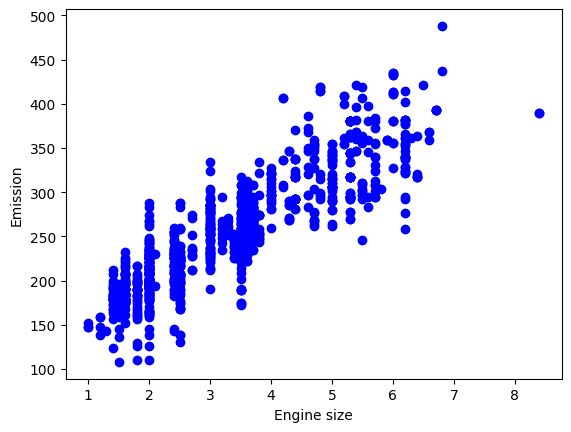

In [108]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Creación del Conjunto de Datos de Entrenamiento y Prueba

La División de Entrenamiento/Prueba (*Train/Test Split*) implica dividir el conjunto de datos en conjuntos de entrenamiento y prueba respectivamente, que son **mutuamente excluyentes**. Después, se entrena con el conjunto de entrenamiento y se prueba con el conjunto de prueba.
Esto proporcionará una evaluación más precisa de la **precisión fuera de la muestra** (*out-of-sample accuracy*), ya que el conjunto de datos de prueba no forma parte del conjunto de datos que se ha utilizado para entrenar el modelo. Por lo tanto, nos da una mejor comprensión de qué tan bien nuestro modelo **generaliza** a nuevos datos.

Conocemos el resultado de cada punto de datos en el conjunto de prueba, ¡lo que lo hace ideal para probar\! Dado que estos datos no se han utilizado para entrenar el modelo, el modelo no tiene conocimiento del resultado de estos puntos de datos. Así que, en esencia, es verdaderamente una prueba fuera de la muestra.

Dividamos nuestro conjunto de datos en conjuntos de entrenamiento y prueba. Alrededor del **80%** del conjunto de datos completo se utilizará para el entrenamiento y el **20%** para las pruebas. Creamos una máscara para seleccionar filas aleatorias utilizando la función **`np.random.rand()`**:


In [109]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Distribución de los Datos de Entrenamiento


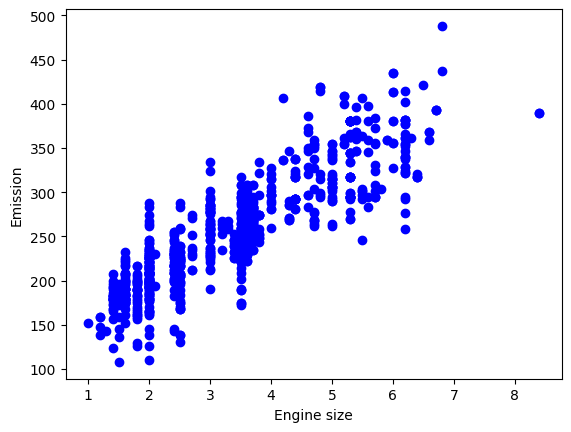

In [110]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<h2 id="multiple_regression_model">Modelo de Regresión Múltiple</h2>


En realidad, existen múltiples variables que impactan la emisión de CO2. Cuando está presente **más de una variable independiente**, el proceso se denomina **Regresión Lineal Múltiple**. Un ejemplo de regresión lineal múltiple es predecir la emisión de CO2 utilizando las características **FUELCONSUMPTION\_COMB**, **EngineSize** y **Cylinders** de los coches. Lo bueno aquí es que el modelo de regresión lineal múltiple es la extensión del modelo de regresión lineal simple.


In [111]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[9.95111443 7.97796359 9.71976481]]


Como se mencionó antes, el **Coeficiente** y el **Intercepto** son los parámetros de la línea ajustada.
Dado que es un modelo de regresión lineal múltiple con 3 parámetros y que los parámetros son el intercepto y los coeficientes del hiperplano, sklearn puede estimarlos a partir de nuestros datos. Scikit-learn utiliza el método simple de **Mínimos Cuadrados Ordinarios (OLS)** para resolver este problema.

#### Mínimos Cuadrados Ordinarios (OLS)

OLS es un método para estimar los parámetros desconocidos en un modelo de regresión lineal. OLS elige los parámetros de una función lineal de un conjunto de variables explicativas **minimizando la suma de los cuadrados de las diferencias** entre la variable dependiente objetivo y las predichas por la función lineal. En otras palabras, intenta minimizar la Suma de Errores Cuadrados (**SSE**) o el Error Cuadrático Medio (**MSE**) entre la variable objetivo ($y$) y nuestra salida predicha ($\hat{y}$) sobre todas las muestras en el conjunto de datos.

OLS puede encontrar los mejores parámetros utilizando uno de los siguientes métodos:

  * Resolver los parámetros del modelo analíticamente utilizando ecuaciones de **forma cerrada**.
  * Utilizar un **algoritmo de optimización** (Descenso de Gradiente, Descenso de Gradiente Estocástico, Método de Newton, etc.).


<h2 id="prediction">Predicción</h2>


In [112]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE) : 551.39
Variance score: 0.87


/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


**Puntuación de Regresión de Varianza Explicada:**
Sea $\hat{y}$ el resultado objetivo estimado, $y$ el resultado objetivo correspondiente (correcto), y $Var$ la Varianza (el cuadrado de la desviación estándar). Entonces, la varianza explicada se estima de la siguiente manera:

$$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$$

La mejor puntuación posible es **1.0**, y los valores más bajos son peores.


<h2 id="practice">Practica</h2>

Intenta usar una regresión lineal múltiple con el mismo conjunto de datos, pero esta vez usa **FUELCONSUMPTION_CITY** y **FUELCONSUMPTION_HWY** en lugar de **FUELCONSUMPTION_COMB**. 

¿Resulta en una mejor precisión?

In [113]:
# Importa el modelo de regresión lineal desde scikit-learn

from sklearn import linear_model

# Selecciona las columnas que usarás como variables independientes (X) del conjunto de entrenamiento.

x = np.asanyarray(train[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY"]])


# asegúrate de que las columnas existen en el DataFrame 'train' y que están bien escritas.

print(train.dtypes)

# Selecciona la variable dependiente (Y), es decir, el valor que queremos predecir: las emisiones de CO2.

y = np.asanyarray(train[["CO2EMISSIONS"]])

# Entrena el modelo con los datos de entrenamiento (ajusta los coeficientes).

regr = linear_model.LinearRegression()

regr.fit(x,y)

# Muestra los coeficientes obtenidos tras el entrenamiento.

coef = regr.coef_

print(coef)

# cada número indica cuánto influye cada variable (motor, cilindros, consumo...) en las emisiones.

# Realiza predicciones con el conjunto de prueba usando las mismas variables independientes.

x = np.asanyarray(test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY"]])
y = np.asanyarray(test[['CO2EMISSIONS']])

y_hat = regr.predict(x)

# cambia las columnas si tu conjunto de datos tiene nombres diferentes.

# Extrae las variables reales (X e Y) del conjunto de prueba para poder evaluar el modelo.

# Calcula el error cuadrático medio (MSE), una medida de la precisión del modelo.
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))
print("R2 ",regr.score(x,y))
# cuanto menor sea este valor, mejor es el ajuste.

# Calcula el coeficiente de determinación R² (score del modelo).
#  un valor cercano a 1 indica que el modelo explica bien la variabilidad de los datos.



ENGINESIZE              float64
CYLINDERS                 int64
FUELCONSUMPTION_CITY    float64
FUELCONSUMPTION_HWY     float64
FUELCONSUMPTION_COMB    float64
CO2EMISSIONS              int64
dtype: object
[[9.95092534 7.49028298 6.70241026 2.61909671]]
Mean Squared Error (MSE) : 556.68
R2  0.866016322689487


### ¡Gracias por completar este laboratorio! 🎉

## Autor

Saeed Aghabozorgi

### Otros Contribuidores

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

### Traducción

<a href="https://www.linkedin.com/in/carlostessier/" target="_blank">Carlos Tessier</a>

 

## <h3 align="center"> © Corporación IBM 2025. Todos los derechos reservados. <h3/>